In [32]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float32, color, transform, util, exposure

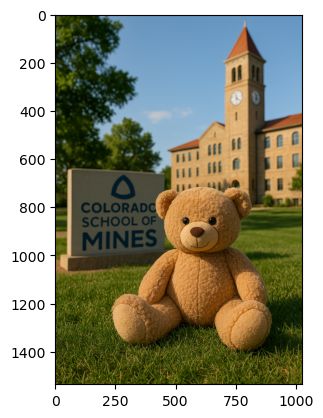

In [6]:
rgbImg = io.imread('data/Mines_Teddy_Bear.png')

plt.imshow(rgbImg)

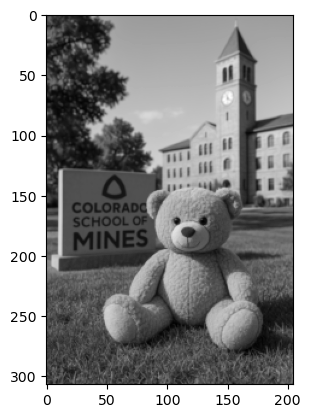

In [13]:
grayImg = img_as_float32(color.rgb2gray(rgbImg))
Img = transform.rescale(grayImg, 1/5)
plt.imshow(Img, cmap="gray")

In [14]:
from PIL import Image, ImageFilter

In [18]:
pilImg = Image.fromarray(util.img_as_ubyte(Img))

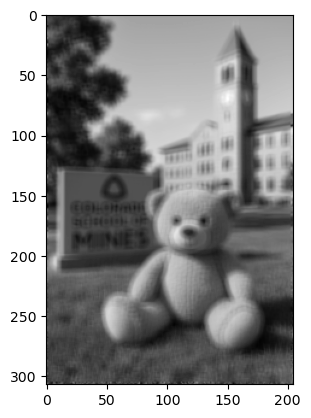

In [20]:
blurred_img = pilImg.filter(ImageFilter.BLUR)
plt.imshow(blurred_img, cmap="gray")

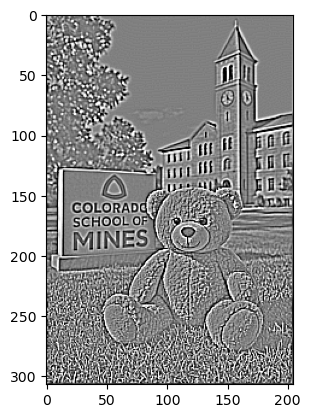

In [41]:
# apply a custom filter (e.g., edge detection)

kernel = [-1, -1, -1,
          -1, 8, -1,
          -1, -1, -1]

filtered_pil = pilImg.filter(ImageFilter.Kernel((3, 3), kernel, scale=1, offset=128))

# Convert back to float NumPy array
filtered_np = np.array(filtered_pil).astype(np.float32)

# Rescale to [0,1] for display
filtered_rescaled = exposure.rescale_intensity(filtered_np, out_range=(0,1))

# print(filtered_rescaled)
plt.imshow(filtered_rescaled, cmap="gray")